In [2]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
import numpy as np
import matplotlib.pyplot as plt


In [3]:
DATA_DIR = "./data/News/"

emb = np.load(f"{DATA_DIR}train_embeddings.npy")
label = np.load(f"{DATA_DIR}train_labels.npy")
label_emb = np.load(f"{DATA_DIR}label_text_embeddings.npy")

In [4]:
emb_all = np.vstack((emb, label_emb))

To classify a text sample, choose the label of shortest geodesic distance (via Dijkstra's on the KNN graph constructed for Isomap)

In [5]:
iso_accuracies = []
dims= [50, 100, 200, 300, 400, 500, 600, 700, 768]

for dim in dims: 
    iso = Isomap(n_neighbors=dim, n_jobs=-1)
    iso.fit(emb_all)
    distances = iso.dist_matrix_
    num_labels = label_emb.shape[0]
    dists_to_labels = distances[:-num_labels, -num_labels:] # N x 20
    y_hat = np.argmin(dists_to_labels, axis=1)
    accuracy = np.mean([y_hat == label])
    iso_accuracies.append(accuracy)
    print(dim)

50
100
200
300
400
500
600
700
768


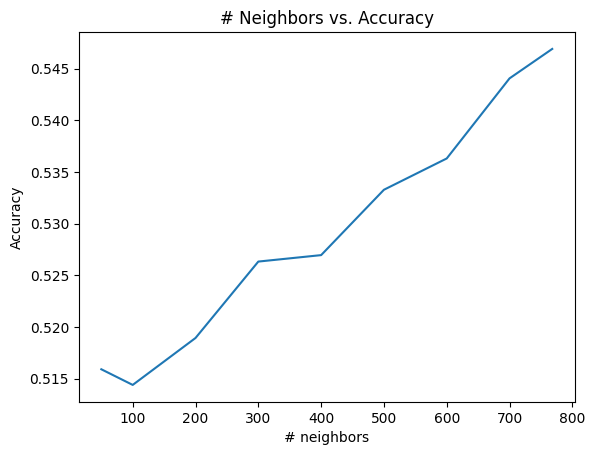

In [8]:
plt.plot(dims, iso_accuracies)
plt.xlabel("# neighbors")
plt.ylabel("Accuracy")
plt.title("# Neighbors vs. Accuracy")
plt.show()